In [29]:
#Exercice 6p170
#a)
(exp(-6+0.05*40+3.5))/(1+exp(-6+0.05*40+3.5))

[1] 0.3775407

The probability that a students who studied 40h and has GPA of 3.5 gets an A is 37.8%

In [31]:
#b)
#exp(-6+0.05*X1+3.5)/(1+exp(-6+0.05*X1+3.5)=0.5
#log(exp(-6+0.05*X1+3.5))=log(1)
X1=2.5/0.05
X1

[1] 50

A student needs to study at least 50 hours to get an A

In [ ]:
#Exercice 8p170
The average error with the KNN method is difficult to analyze as the KNN method is likely to overfit. 
Thus, maybe the error is very low on the training set and very high on the test set. 
The test have been made for K=1. 
If the classification problems involves two class, the error in the train set will be 0% and 36% in the test set, 
which is bigger than the regression model errors.

We know that this is normal that the error is less important on the train set rater than in the test set. 
So, a 10% difference between the error in Train and Test Set could be acceptable as in the regression. 
We will better go for the regression model.

In [1]:
#Exercice 9p170
#a)
#Prob=odds/(1-odds)
Prob=0.37/(1+0.37)
Prob
#Probability of 27% of people with an odd of 0.37 default

[1] 0.270073

In [2]:
Prob=0.16/(1-0.16)
Prob
#The odd that this people default is 19%

[1] 0.1904762

In [3]:
#Exercice 10p170
#a)
install.packages("ISLR")
library(ISLR)

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rsmadja\AppData\Local\Temp\RtmpSSA0PA\downloaded_packages


Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [4]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [5]:
unique(Weekly$Year)

[1] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
[16] 2005 2006 2007 2008 2009 2010

In [6]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [7]:
 dim(Weekly)

[1] 1089    9

In [8]:
cor(Weekly[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


The correlations between the lag variables and today's returns are close to zero. The only correlation we can directly see is between the year and the volume.

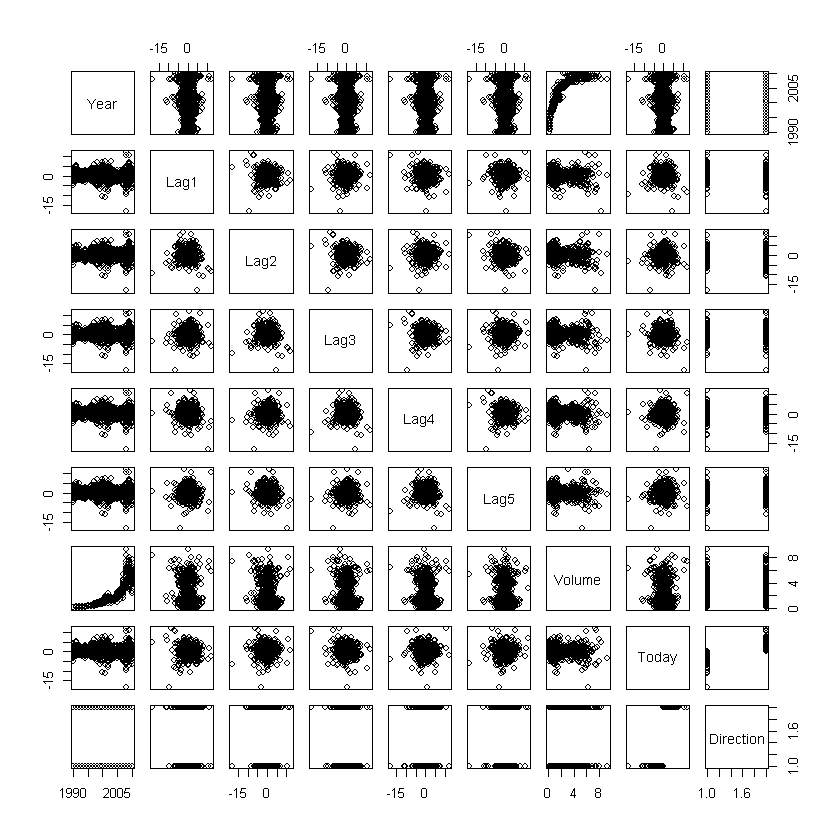

In [9]:
pairs(Weekly)  

The pairs plot confirm the previous assumption, There is a correlation between year and volume.

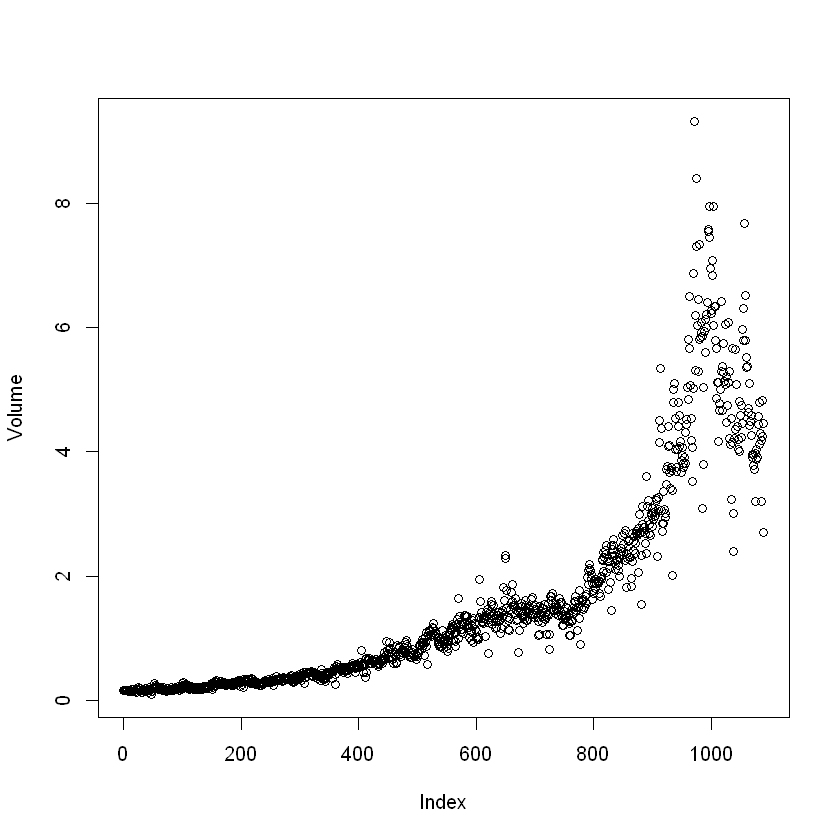

In [10]:
attach(Weekly)
plot(Volume)

We can see an increase of the volume over time

In [11]:
#b)
 glm.fits=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume ,
data=Weekly ,family=binomial )
summary (glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The smaller p-value is for Lag2
This means that the coefficient of 0.05 explains that if the market has a positive return before yesterday, this is more likely to go up today. 
All the other predictors are not significant.

In [12]:
#c)
glm.probs=predict (glm.fits,type="response")
glm.probs [1:10]


1         2         3         4         5         6         7         8 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013 0.5684190 0.5786097 0.5151972 
        9        10 
0.5715200 0.5554287

In [13]:
glm.pred=rep("Down" ,1089)
glm.pred[glm.probs >.5]=" Up"

table(glm.pred ,Direction )

        Direction
glm.pred Down  Up
     Up   430 557
    Down   54  48

The model correctly predict that the market will go down during 54 days and up during 557 days. 
So we have 611 true predictions. 

In [14]:
mean(glm.pred==Direction)

[1] 0.04958678

In [15]:
611/1089

[1] 0.5610652

Logistic regression correctly predicted the movement of the market 52.2 % of the time, which is low and lead to an important training error. 
We need to fit the model using only a partion of the data and make the prediction on the validation set. We also need to select only the significant variables.

In [16]:
#d)
train <- (Year < 2009)
Weekly.2009 <- Weekly[!train, ]
Direction.2009 <- Direction[!train]

In [17]:
glm.fits=glm(Direction∼Lag2,data=Weekly ,family=binomial ,subset=train)

In [18]:
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [19]:
prob <- predict(glm.fits, Weekly.2009, type = "response")
glm.probs <- rep("Down", length(prob))
glm.probs[prob > 0.5] <- "Up"
table(glm.probs, Direction.2009)

         Direction.2009
glm.probs Down Up
     Down    9  5
     Up     34 56

In this case, we have 65 true predictions over 104, it means that 62,5% of the predictions of the years 2009 and 2010 were correctly predicted which is higly preferable.

In [20]:
#e)
library(MASS)
fit.lda <- lda(Direction ~ Lag2, data = Weekly, subset = train)
fit.lda

Warning message:
"package 'MASS' was built under R version 3.6.3"

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

There is a tendency for the 2 previous days percentage return to be negative when the market declines and a positive tendency when the market goes up. We will check for the 

In [21]:
pred.lda <- predict(fit.lda, Weekly.2009)
table(pred.lda$class, Direction.2009)

      Direction.2009
       Down Up
  Down    9  5
  Up     34 56

In [22]:

(9+56)/(9+56+5+34)

[1] 0.625

The true prediction rate is increasing at 62.5% with the LDA method

In [23]:
#f)
fit.qda <- qda(Direction ~ Lag2, data = Weekly, subset = train)
fit.qda

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [24]:
pred.qda <- predict(fit.qda, Weekly.2009)
table(pred.qda$class, Direction.2009)

      Direction.2009
       Down Up
  Down    0  0
  Up     43 61

In [25]:
61/(61+43)

[1] 0.5865385

The true prediction rate is 58%. The weeks when the market is going up, the model always predict correctly the tendency. However, when

In [32]:
#g)
library(class)
train.X <- as.matrix(Lag2[train])
test.X <- as.matrix(Lag2[!train])
train.Y <- Direction[train]
set.seed(1)
pred.knn <- knn(train.X, test.X, train.Y, k = 1)
table(pred.knn, Direction.2009)

Warning message:
"package 'class' was built under R version 3.6.3"

        Direction.2009
pred.knn Down Up
    Down   21 30
    Up     22 31

In [33]:
(21+31)/(21+31+30+22)

[1] 0.5

the true prediction rate for the KNN method with K=1 is 50%. It is the same as having a random model. This is definitely not enough.

In [ ]:
#h)


In resume, we have 
1)Logistic regression : 62,5% of accuracy and LDA: 62.5% of accuracy
3) QDA: 58% of accuracy
4) KNN: 50% of accuracy

In [37]:
#i)
#We can firslt experiment a logistic regression with lag1 et lag2 as predictors ad in the example of the book
fit.glm <- glm(Direction ~ Lag2:Lag1, data = Weekly, family = binomial, subset = train)
probs <- predict(fit.glm, Weekly.2009, type = "response")
pred.glm <- rep("Down", length(prob))
pred.glm[probs > 0.5] = "Up"
table(pred.glm, Direction.2009)

        Direction.2009
pred.glm Down Up
    Down    1  1
    Up     42 60

In [42]:
61/(60+1+1+42)

[1] 0.5865385

The accuracy is only 58%. I believe we could not improve the accuracy from the logistic model as the lag2 was the only significant variable.


In [49]:
#Then, we can also try the LDA with the lag1 and lag2 as predictors
fit.lda <- lda(Direction ~ Lag2:Lag1, data = Weekly, subset = train)
pred.lda <- predict(fit.lda, Weekly.2009)
table(pred.lda$class, Direction.2009)

      Direction.2009
       Down Up
  Down    0  1
  Up     43 60

In [51]:
60/(43+60+1)

[1] 0.5769231

The accuracy is also 57%. Adding Lag1 does not immprove the accuracy rate.

In [54]:
#qda method with all predictors
fit.qda <- qda(Direction ~ Lag2 + Lag1+Lag3+Lag4, data = Weekly, subset = train)
pred.qda <- predict(fit.qda, Weekly.2009)
table(pred.qda$class, Direction.2009)

      Direction.2009
       Down Up
  Down    9 16
  Up     34 45

In [56]:
(9+45)/(9+45+16+34)

[1] 0.5192308

The accuracy is declining since I try to add all the lag as predictors: 51,9%

In [58]:
#We can try the KNN classfier with K=15
pred.knn <- knn(train.X, test.X, train.Y, k = 15)
table(pred.knn, Direction.2009)

        Direction.2009
pred.knn Down Up
    Down   20 20
    Up     23 41

In [59]:
(20+41)/(20+20+23+41)

[1] 0.5865385

The accuracy of the KNN classfier is increasing: 58%

In [60]:
#K=100
pred.knn <- knn(train.X, test.X, train.Y, k = 100)
table(pred.knn, Direction.2009)

        Direction.2009
pred.knn Down Up
    Down    9 12
    Up     34 49

In [61]:
(9+12)/(9+12+34+49)

[1] 0.2019231

The accuracy is very low with K=100: 20%

To conclude, we did not find a better model than the logistic regression and the LDA with only Lag2 as predictor.

In [63]:
#Exercice 11p171
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [66]:
Auto$mpg01 <- ifelse(Auto$mpg>median(Auto$mpg), 1,0)

In [68]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
7,14,8,454,220,4354,9.0,70,1,chevrolet impala,0
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
9,14,8,455,225,4425,10.0,70,1,pontiac catalina,0
10,15,8,390,190,3850,8.5,70,1,amc ambassador dpl,0


In [71]:
cor(Auto[, -9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


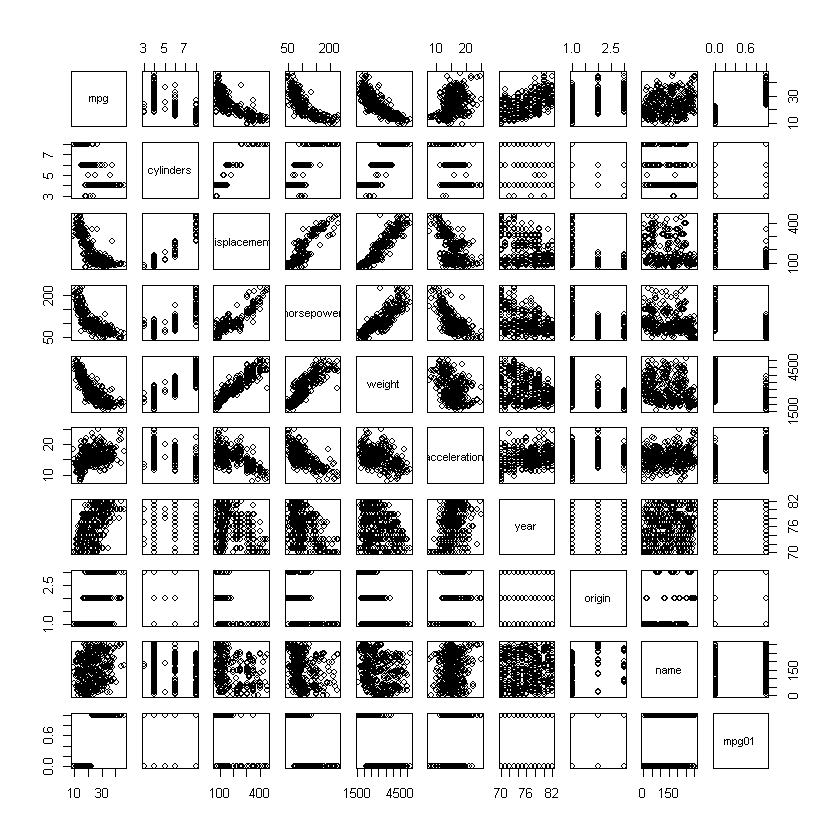

In [72]:
pairs(Auto)

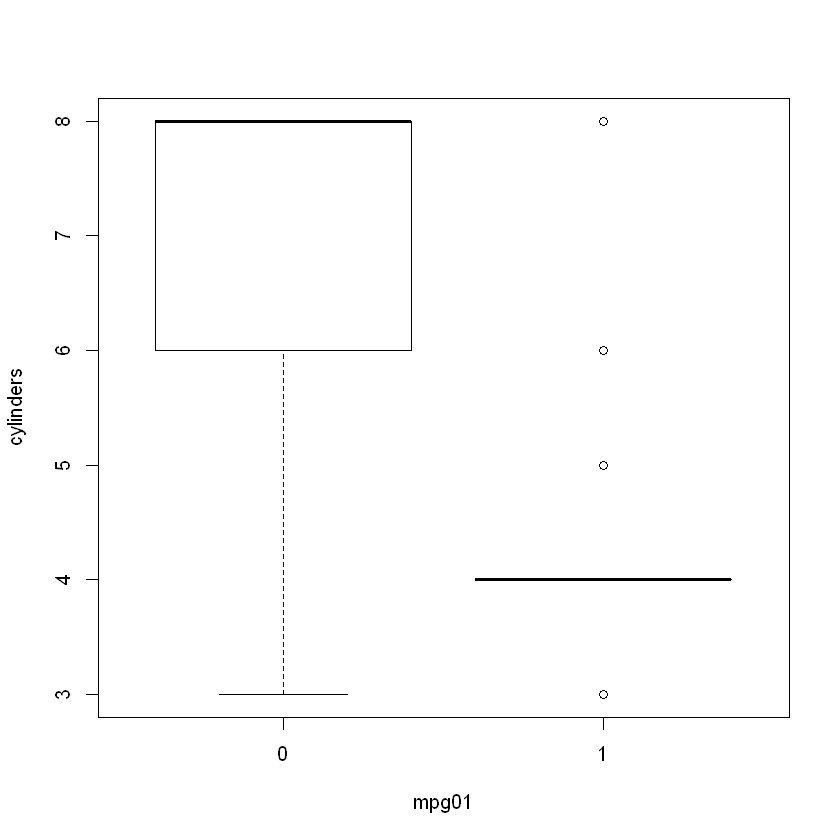

In [74]:
#Boxplot mpg01 and cylinders
boxplot(cylinders ~ mpg01, data = Auto)

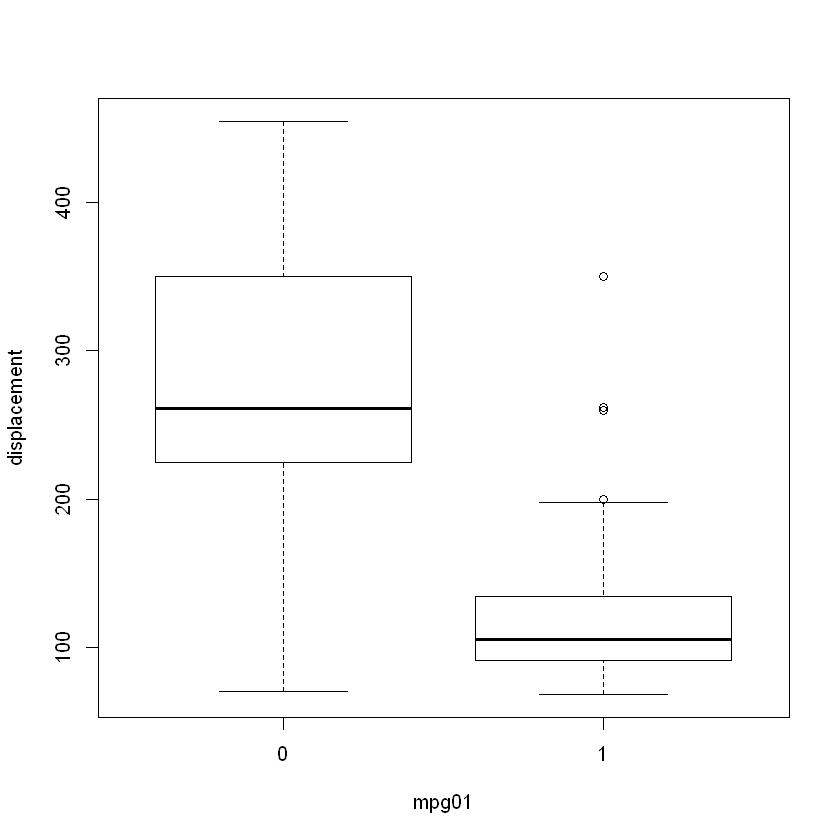

In [75]:
#Boxplot mpg01 and displacement
boxplot(displacement ~ mpg01, data = Auto)

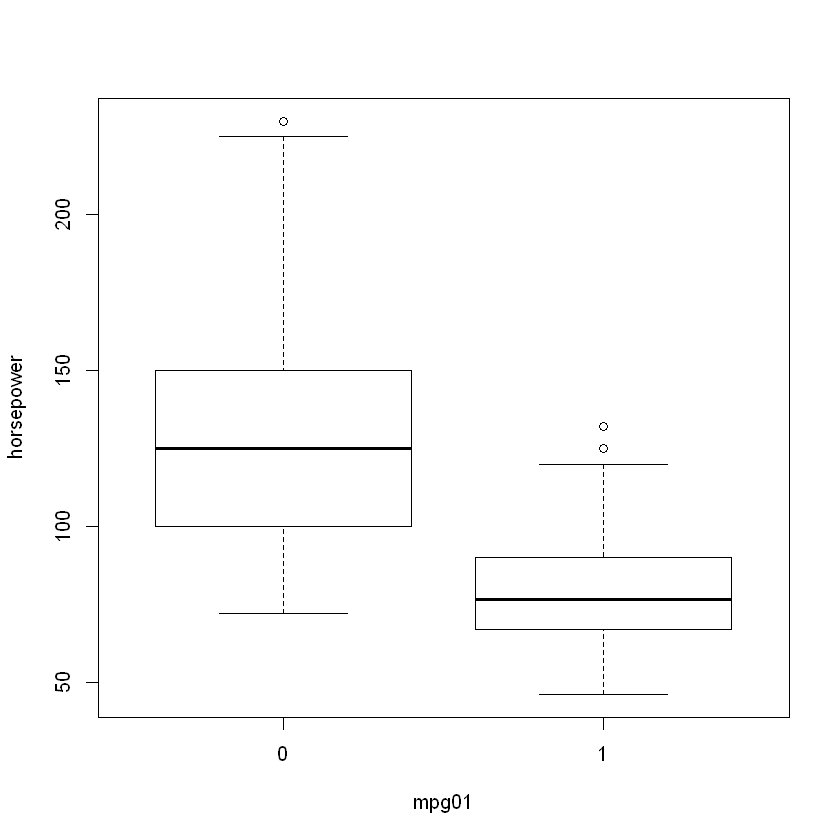

In [76]:
#Boxplot mpg01 and horsepower
boxplot(horsepower ~ mpg01, data = Auto)

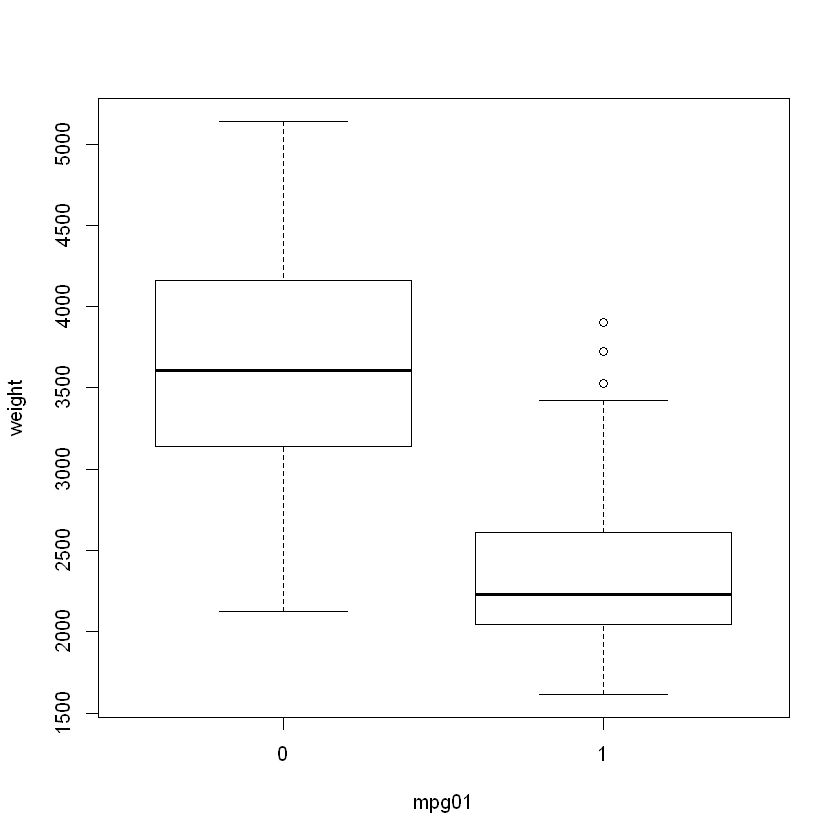

In [77]:
#Boxplot mpg01 and weight
boxplot(weight ~ mpg01, data = Auto)

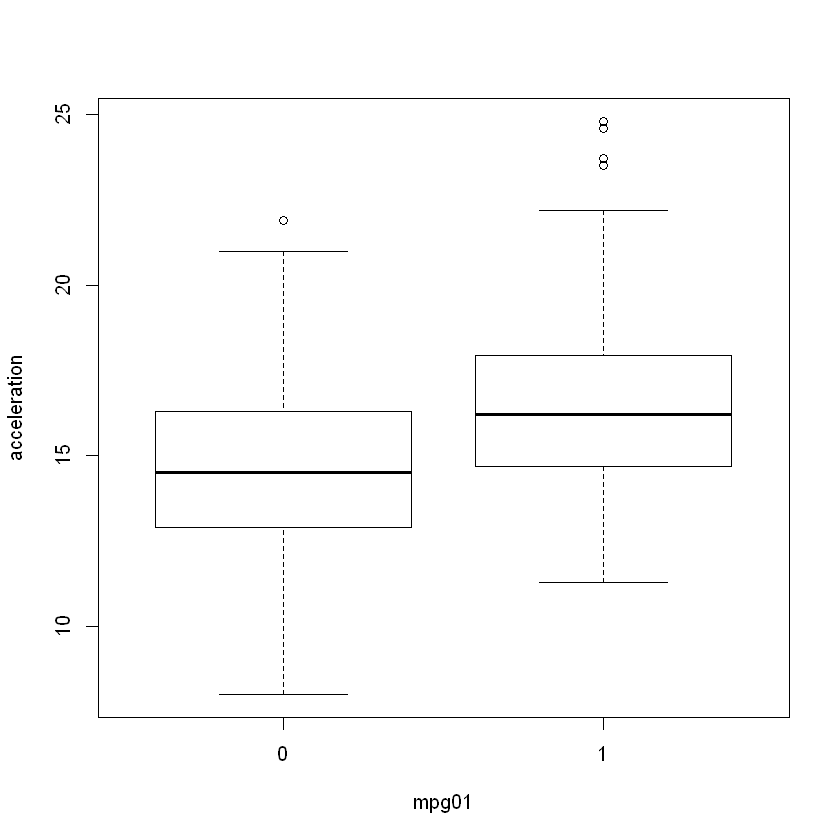

In [78]:
#Boxplot mpg01 and Accelaration
boxplot(acceleration ~ mpg01, data = Auto)

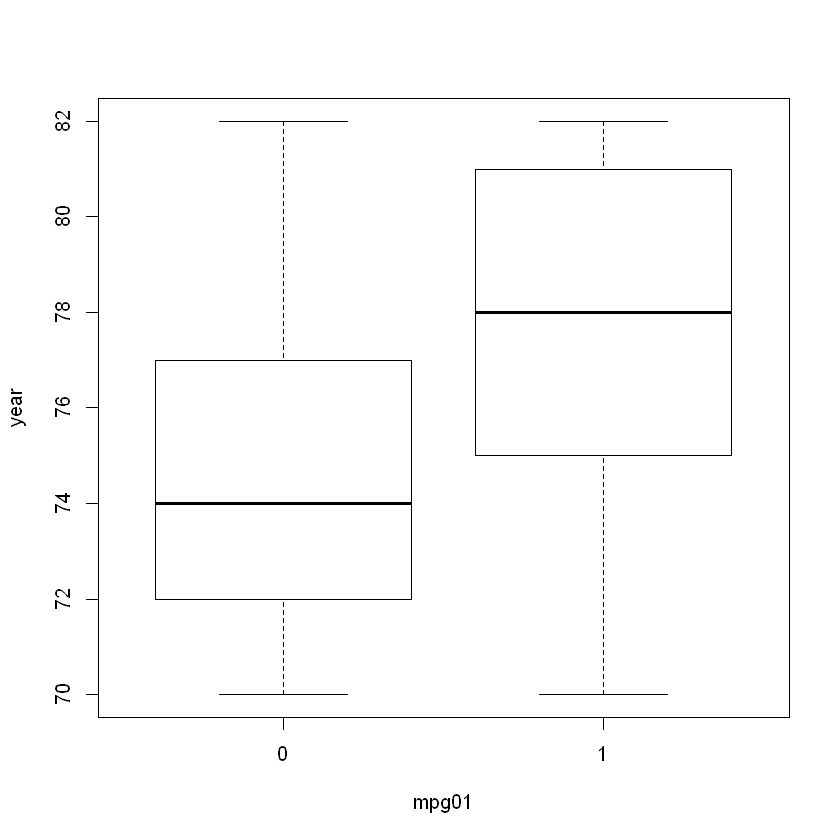

In [80]:
#Boxplot mpg01 and year
boxplot(year ~ mpg01, data = Auto)

There is a correlation between MPG01 and cylinders, weight, displacement and horsepower.

In [183]:
#c)
rands <- rnorm(nrow(Auto))
test <- rands > quantile(rands,0.75)
train <- !test
Auto.train <- Auto[train,]
dim(Auto.train)
Auto.test <- Auto[test,]
dim(Auto.test)

[1] 294  10

[1] 98 10

We split randomly into 75% of the dataset into the train set and 25% into the test set

In [159]:
#d)
fit.lda <- lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train)
fit.lda

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train)

Prior probabilities of groups:
        0         1 
0.4965986 0.5034014 

Group means:
  cylinders   weight displacement horsepower
0  6.835616 3637.007     276.0137  130.62329
1  4.175676 2332.189     116.5709   79.77027

Coefficients of linear discriminants:
                      LD1
cylinders    -0.570845559
weight       -0.001011861
displacement -0.001645188
horsepower    0.009198156

In [160]:
pred.lda <- predict(fit.lda, Auto.test)$class
table(pred.lda ,Auto.test$mpg01)

        
pred.lda  0  1
       0 41  4
       1  9 44

In [161]:
(4+9)/(41+4+9+44)

[1] 0.1326531

The test error rate is 13% with the LDA model.

In [162]:
#e)
fit.qda = qda(mpg01 ~ cylinders + weight + displacement + horsepower, data=Auto.train)
fit.qda



Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train)

Prior probabilities of groups:
        0         1 
0.4965986 0.5034014 

Group means:
  cylinders   weight displacement horsepower
0  6.835616 3637.007     276.0137  130.62329
1  4.175676 2332.189     116.5709   79.77027

ERROR: Error in predict(qda.fit, Auto.test): object 'qda.fit' not found


In [164]:
pred.qda=predict(fit.qda,Auto.test)$class
table(pred.qda,Auto.test$mpg01)

        
pred.qda  0  1
       0 41  5
       1  9 43

In [165]:
(5+9)/(41+5+9+43)

[1] 0.1428571

The test error rate is 14% with the LDA model.

In [166]:
#f)
logit.fit = glm(mpg01 ~ cylinders + weight + displacement + horsepower, family=binomial, data=Auto.train)
summary(logit.fit)



Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = Auto.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3618  -0.1532   0.1368   0.3484   3.3266  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.8090397  1.9596444   6.026 1.68e-09 ***
cylinders    -0.2904241  0.4199242  -0.692  0.48918    
weight       -0.0022660  0.0008064  -2.810  0.00496 ** 
displacement -0.0092322  0.0096643  -0.955  0.33943    
horsepower   -0.0235675  0.0162798  -1.448  0.14772    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 407.56  on 293  degrees of freedom
Residual deviance: 150.54  on 289  degrees of freedom
AIC: 160.54

Number of Fisher Scoring iterations: 7


In [170]:
glm.probs=predict(logit.fit,Auto.test,type="response")
glm.pred=rep(0,nrow(Auto.test))
glm.pred[glm.probs > 0.50]=1

In [171]:
table(glm.pred,Auto.test$mpg01)

        
glm.pred  0  1
       0 40  4
       1 10 44

In [169]:
(4+10)/(40+4+10+44)

[1] 0.1428571

The test error rate is 14% with the Logistic model.

In [185]:
set.seed(1)
Auto.trainknn = Auto.train[,c("horsepower","weight","acceleration")]
Auto.testknn  =  Auto.test[,c("horsepower","weight","acceleration")]

In [186]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=1)

In [187]:
table(knn.pred,Auto.test$mpg01)

        
knn.pred  0  1
       0 35  6
       1  9 48

In [189]:
1- mean(knn.pred==Auto.test$mpg01)

[1] 0.1530612

The test error rate for k=1 is 15%

In [202]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=2)

In [203]:
table(knn.pred,Auto.test$mpg01)
1- mean(knn.pred==Auto.test$mpg01)

        
knn.pred  0  1
       0 35  7
       1  9 47

[1] 0.1632653

The test error for k=2 is 16%

In [204]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=3)

In [205]:
table(knn.pred,Auto.test$mpg01)
1- mean(knn.pred==Auto.test$mpg01)

        
knn.pred  0  1
       0 37  6
       1  7 48

[1] 0.1326531

The test error for k=3 is 13%

In [206]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=4)

In [207]:
table(knn.pred,Auto.test$mpg01)
1- mean(knn.pred==Auto.test$mpg01)

        
knn.pred  0  1
       0 36  8
       1  8 46

[1] 0.1632653

The test error for k=4 is 16%

In [196]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=5)

In [197]:
table(knn.pred,Auto.test$mpg01)

        
knn.pred  0  1
       0 37  7
       1  7 47

In [198]:
1- mean(knn.pred==Auto.test$mpg01)

[1] 0.1428571

The test error rate for k=5 is 14%

In [199]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=10)
table(knn.pred,Auto.test$mpg01)
1- mean(knn.pred==Auto.test$mpg01)

        
knn.pred  0  1
       0 36  7
       1  8 47

[1] 0.1530612

The test error rate for k=10 is 15%

In [208]:
knn.pred=knn(Auto.trainknn,Auto.testknn,Auto.train$mpg01,k=100)
table(knn.pred,Auto.test$mpg01)
1- mean(knn.pred==Auto.test$mpg01)

        
knn.pred  0  1
       0 35  6
       1  9 48

[1] 0.1530612

We can conclude that the optimal k is k=3 as it computes the lowest error rate : 13%. It performs similarly with the LDA model